In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
files = ['1997-wnba-attendance.csv', '1998-wnba-attendance.csv', '1999-wnba-attendance.csv', '2000-wnba-attendance.csv', '2001-wnba-attendance.csv', '2002-wnba-attendance.csv', '2003-wnba-attendance.csv', '2004-wnba-attendance.csv', '2005-wnba-attendance.csv', '2006-wnba-attendance.csv', '2007-wnba-attendance.csv', '2008-wnba-attendance.csv', '2009-wnba-attendance.csv', '2010-wnba-attendance.csv', '2011-wnba-attendance.csv', '2012-wnba-attendance.csv', '2013-wnba-attendance.csv', '2014-wnba-attendance.csv', '2015-wnba-attendance.csv', '2016-wnba-attendance.csv', '2017-wnba-attendance.csv', '2018-wnba-attendance.csv', '2019-wnba-attendance.csv', '2021-wnba-attendance.csv', '2022-wnba-attendance.csv', '2023-wnba-attendance.csv', '2024-wnba-attendance.csv']

In [39]:
dataframes_list = []

for i in range(len(files)):
    temp_df = pd.read_csv("../data/"+files[i])
    dataframes_list.append(temp_df)

In [139]:
dataframes_list

[                  Team  Num Games    Low   High   Total       Average
 0      Phoenix Mercury         14  10898  17747  191835  13702.500000
 1     New York Liberty         14   8554  18051  185786  13270.428571
 2       Houston Comets         14   5933  16285  135842   9703.000000
 3   Los Angeles Sparks         14   5987  14457  125034   8931.000000
 4      Charlotte Sting         14   6045  18937  116296   8306.857143
 5    Cleveland Rockers         14   4301  13766  111600   7971.428571
 6  Sacramento Monarchs         14   5795  15259  110014   7858.142857
 7          Utah Starzz         14   5783   8970  105612   7543.714286,
                   Team  Num Games    Low   High   Total       Average
 0   Washington Mystics         15  10364  20674  238647  15909.800000
 1     New York Liberty         15  11276  19563  224024  14934.933333
 2      Phoenix Mercury         15  12522  16823  206476  13765.066667
 3       Houston Comets         15   8853  16285  189029  12601.933333
 4   

In [149]:
attendance = pd.concat([pd.read_csv("../data/"+fp).assign(Year=os.path.basename(fp)) for fp in files])
attendance['Year'] = attendance['Year'].str.split('-').str[0].astype(int)
attendance

,Team,Num Games,Low,High,Total,Average,Year
0,Phoenix Mercury,14,10898,17747,191835,13702.500000,1997
1,New York Liberty,14,8554,18051,185786,13270.428571,1997
2,Houston Comets,14,5933,16285,135842,9703.000000,1997
3,Los Angeles Sparks,14,5987,14457,125034,8931.000000,1997
4,Charlotte Sting,14,6045,18937,116296,8306.857143,1997
...,...,...,...,...,...,...,...
7,Chicago Sky,20,7807,9872,175148,8757.400000,2024
8,Connecticut Sun,20,5346,19125,169012,8450.600000,2024
9,Washington Mystics,20,4200,20711,130830,6541.500000,2024
10,Dallas Wings,20,5129,6251,118217,5910.850000,2024


In [191]:
game_stats = pd.read_csv('../data/wnba_elo.csv')
game_stats

,season,date,playoff,neutral,status,home_team,away_team,home_team_abbr,away_team_abbr,home_team_pregame_rating,away_team_pregame_rating,home_team_winprob,away_team_winprob,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,commissioners_cup_final
0,1997,1997-06-20,0,0,post,Las Vegas Aces,Sacramento Monarchs,LVA,SAC,1500.000000,1500.000000,0.613137,0.386863,60,70,1480.965871,1519.034129,0
1,1997,1997-06-20,0,0,post,Los Angeles Sparks,New York Liberty,LAS,NYL,1500.000000,1500.000000,0.613137,0.386863,57,67,1480.965871,1519.034129,0
2,1997,1997-06-20,0,0,post,Cleveland Rockers,Houston Comets,CLE,HOU,1500.000000,1500.000000,0.613137,0.386863,56,76,1469.955804,1530.044196,0
3,1997,1997-06-21,0,0,post,Phoenix Mercury,Charlotte Sting,PHO,CHA,1500.000000,1500.000000,0.613137,0.386863,76,59,1514.912022,1485.087978,0
4,1997,1997-06-22,0,0,post,Sacramento Monarchs,New York Liberty,SAC,NYL,1519.034129,1519.034129,0.613137,0.386863,62,73,1498.837413,1539.230844,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,2022,2022-09-08,1,0,post,Chicago Sky,Connecticut Sun,CHI,CON,1626.455038,1658.075826,0.586161,0.413839,63,72,1609.667208,1674.863657,0
5837,2022,2022-09-11,1,0,post,Las Vegas Aces,Connecticut Sun,LVA,CON,1679.682478,1674.863657,0.648014,0.351986,67,64,1684.761569,1669.784565,0
5838,2022,2022-09-13,1,0,post,Las Vegas Aces,Connecticut Sun,LVA,CON,1684.761569,1669.784565,0.664500,0.335500,85,71,1695.795823,1658.750311,0
5839,2022,2022-09-15,1,0,post,Connecticut Sun,Las Vegas Aces,CON,LVA,1658.750311,1695.795823,0.576661,0.423339,105,76,1682.996272,1671.549863,0


In [261]:
total_games = game_stats['season'].value_counts().reset_index().sort_values('season', ascending=True)
total_games

,season,count
25,1997,115
23,1998,158
22,1999,203
2,2000,272
0,2001,274
1,2002,273
5,2003,257
9,2004,240
10,2005,238
4,2006,257


Text(0, 0.5, 'Game Total')

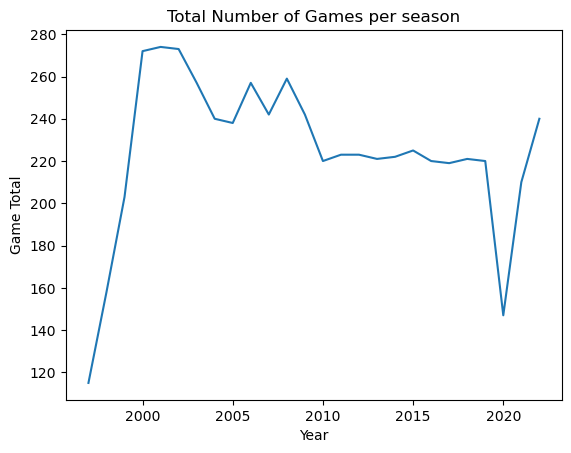

In [269]:
sns.lineplot(data = total_games,
           x='season',
           y = 'count')

plt.title('Total Number of Games per season')
plt.xlabel('Year')
plt.ylabel('Game Total')

In [245]:
teams = attendance['Year'].value_counts().reset_index().sort_values('Year', ascending=True)
teams

,Year,count
26,1997,8
25,1998,10
23,1999,12
0,2000,16
1,2001,16
2,2002,16
4,2003,14
6,2004,13
7,2005,13
3,2006,14


Text(0, 0.5, 'Number of Teams')

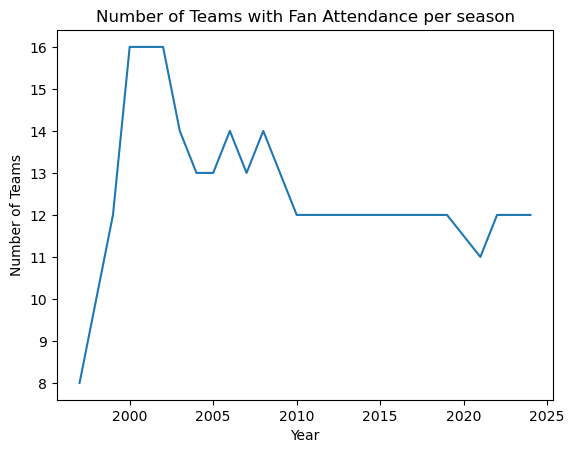

In [257]:
sns.lineplot(data = teams,
           x='Year',
           y = 'count')

plt.title('Number of Teams with Fan Attendance per season')
plt.xlabel('Year')
plt.ylabel('Number of Teams')

In [273]:
games = attendance[['Year', 'Num Games']]
games

,Year,Num Games
0,1997,14
1,1997,14
2,1997,14
3,1997,14
4,1997,14
...,...,...
7,2024,20
8,2024,20
9,2024,20
10,2024,20
